# EDA FOR HAPPINESS CSV
### By: Liseth Esmeralda Erazo Varela

As a starter, let’s import the dependencies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from fitter import Fitter 
import os

Charge the dataset 

In [2]:
data2015 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2015.csv')
data2016 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2016.csv')
data2017 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2017.csv')
data2018 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2018.csv')
data2019 = pd.read_csv('/home/user/workshop3_ml_datastreaming/data/raw/2019.csv')


Checking the different features present in the dataset and shape

In [3]:
data2015.columns.values

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

In [4]:
data2016.columns.values

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'], dtype=object)

In [5]:
data2017.columns.values

array(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'], dtype=object)

In [6]:
data2018.columns.values

array(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], dtype=object)

In [7]:
data2019.columns.values

array(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], dtype=object)

In [8]:
data2015.shape

(158, 12)

In [9]:
data2016.shape

(157, 13)

In [10]:
data2017.shape

(155, 12)

In [11]:
data2018.shape

(156, 9)

In [12]:
data2019.shape

(156, 9)

Check the nulls 

In [13]:
data2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [14]:
data2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [15]:
data2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [16]:
data2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [17]:
data2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

we need standarize the columns names for do the merge. 

In [18]:
column_rename_map = {
    'Country': 'Country',
    'Country or region': 'Country',
    'Happiness Rank': 'Rank',
    'Happiness.Rank': 'Rank',
    'Overall rank': 'Rank',
    
    'Happiness Score': 'Score',
    'Happiness.Score': 'Score',
    'Score': 'Score',
    
    'Economy (GDP per Capita)': 'GDP per capita',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'GDP per capita': 'GDP per capita',
    
    'Family': 'Social support',
    'Social support': 'Social support',
    
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Healthy life expectancy': 'Healthy life expectancy',
    
    'Freedom': 'Freedom to make life choices',
    'Freedom to make life choices': 'Freedom to make life choices',
    
    'Trust (Government Corruption)': 'Perceptions of corruption',
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Perceptions of corruption': 'Perceptions of corruption',
    
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual',
    'Dystopia.Residual': 'Dystopia Residual'
}

In [19]:
def prepare_data(df, year):
    df = df.rename(columns=column_rename_map)
    df['Year'] = year
    return df[[
        'Country', 'Year', 'Rank', 'Score', 'GDP per capita', 'Social support',
        'Healthy life expectancy', 'Freedom to make life choices',
        'Generosity', 'Perceptions of corruption', 'Dystopia Residual'
    ] if 'Dystopia Residual' in df.columns else [
        'Country', 'Year', 'Rank', 'Score', 'GDP per capita', 'Social support',
        'Healthy life expectancy', 'Freedom to make life choices',
        'Generosity', 'Perceptions of corruption'
    ]]


In [20]:
df15 = prepare_data(data2015, 2015)
df16 = prepare_data(data2016, 2016)
df17 = prepare_data(data2017, 2017)
df18 = prepare_data(data2018, 2018)
df19 = prepare_data(data2019, 2019)


In [21]:
df15.head()
df16.head()
df17.head()
df18.head()
df19.head()

,Country,Year,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
df = pd.concat([df15, df16, df17, df18, df19], ignore_index=True)


In [23]:
df.head()

,Country,Year,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


Create a sequential ID by year (format: YYYYNN, e.g., 202301, 202302...)


In [24]:
df['ID'] = (
    df.groupby('Year').cumcount() + 1
).astype(str).str.zfill(2)  
df['ID'] = df['Year'].astype(str) + df['ID']

In [25]:
df.head()

,Country,Year,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual,ID
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,201501
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,201502
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,201503
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531,201504
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176,201505


Now, lets make the EDA 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       782 non-null    object 
 1   Year                          782 non-null    int64  
 2   Rank                          782 non-null    int64  
 3   Score                         782 non-null    float64
 4   GDP per capita                782 non-null    float64
 5   Social support                782 non-null    float64
 6   Healthy life expectancy       782 non-null    float64
 7   Freedom to make life choices  782 non-null    float64
 8   Generosity                    782 non-null    float64
 9   Perceptions of corruption     781 non-null    float64
 10  Dystopia Residual             470 non-null    float64
 11  ID                            782 non-null    object 
dtypes: float64(8), int64(2), object(2)
memory usage: 73.4+ KB


In [27]:
df.describe()

,Year,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia Residual
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,470.000000
mean,2016.993606,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436,2.092717
std,1.417364,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816,0.565772
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2016.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000,1.737975
50%,2017.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000,2.094640
75%,2018.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030,2.455575
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,3.837720


In [28]:
df.isnull().sum()

Country                           0
Year                              0
Rank                              0
Score                             0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         1
Dystopia Residual               312
ID                                0
dtype: int64

In [29]:
na = df[df.isnull().any(axis=1)]
print(na)
df = df.dropna()

                      Country  Year  Rank  Score  GDP per capita  \
470                   Finland  2018     1  7.632           1.305   
471                    Norway  2018     2  7.594           1.456   
472                   Denmark  2018     3  7.555           1.351   
473                   Iceland  2018     4  7.495           1.343   
474               Switzerland  2018     5  7.487           1.420   
..                        ...   ...   ...    ...             ...   
777                    Rwanda  2019   152  3.334           0.359   
778                  Tanzania  2019   153  3.231           0.476   
779               Afghanistan  2019   154  3.203           0.350   
780  Central African Republic  2019   155  3.083           0.026   
781               South Sudan  2019   156  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
470           1.592                    0.874                         0.681   
471           1.582        

In [30]:
df.shape

(470, 12)

Drop 'Dystopia Residual' column due to excessive null values and irrelevance (confirmed with stakeholders). 

In [31]:
df = df.drop(columns=['Dystopia Residual'], errors='ignore')

In [32]:
df.head(10)

,Country,Year,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,ID
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,201501
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,201502
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,201503
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,201504
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,201505
5,Finland,2015,6,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,201506
6,Netherlands,2015,7,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814,201507
7,Sweden,2015,8,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844,201508
8,New Zealand,2015,9,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,201509
9,Australia,2015,10,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637,201510


Text(0.5, 1.0, 'Happiness Score Distribution')

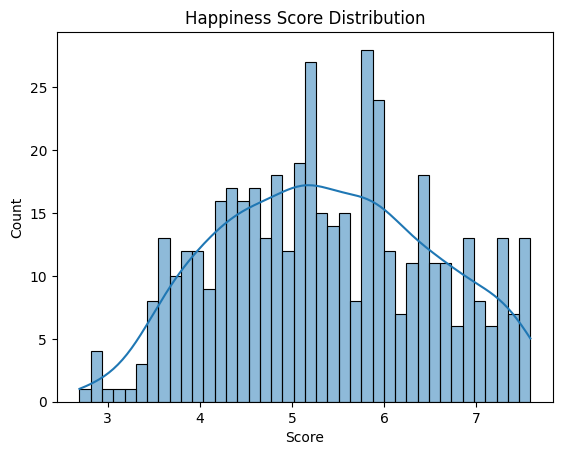

In [33]:
sns.histplot(df['Score'], bins=40, kde=True)
plt.title("Happiness Score Distribution")

Text(0.5, 1.0, 'Distribución del Score por Año')

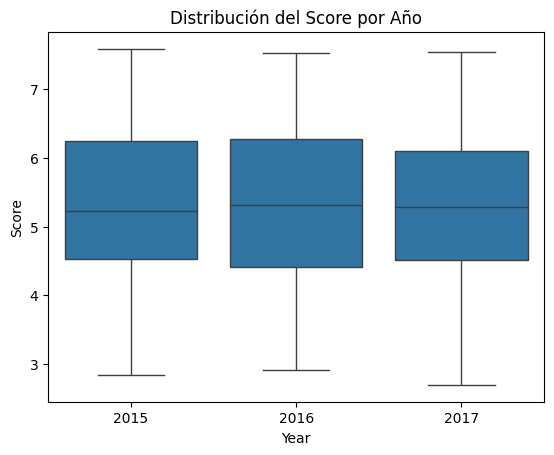

In [34]:
sns.boxplot(x='Year', y='Score', data=df)
plt.title("Distribución del Score por Año")

Text(0, 0.5, 'Score promedio')

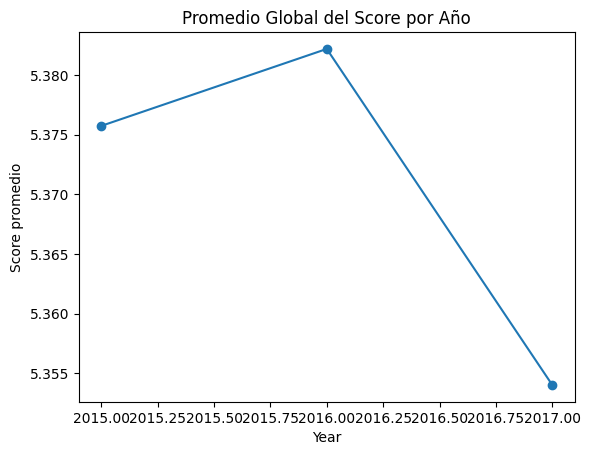

In [35]:
df.groupby('Year')['Score'].mean().plot(marker='o')
plt.title("Promedio Global del Score por Año")
plt.ylabel("Score promedio")

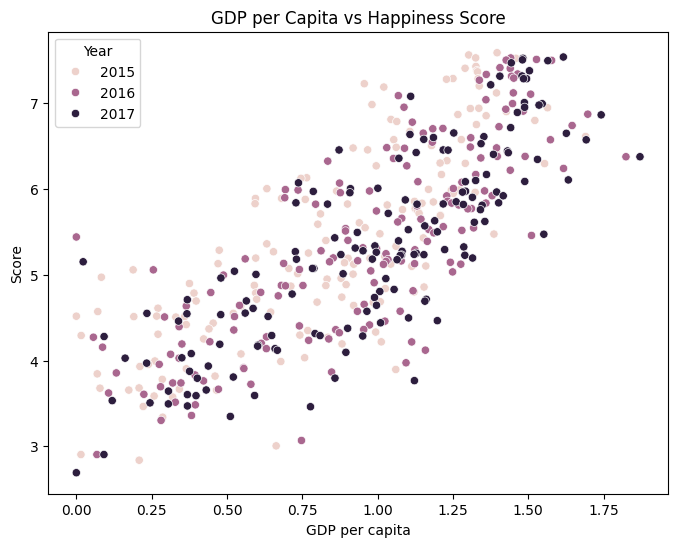

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP per capita', y='Score', hue='Year', data=df)
plt.title('GDP per Capita vs Happiness Score')
plt.savefig('../results/plots/gdp_vs_happiness.png')
plt.show()

In [37]:
df.head

<bound method NDFrame.head of                       Country  Year  Rank  Score  GDP per capita  \
0                 Switzerland  2015     1  7.587        1.396510   
1                     Iceland  2015     2  7.561        1.302320   
2                     Denmark  2015     3  7.527        1.325480   
3                      Norway  2015     4  7.522        1.459000   
4                      Canada  2015     5  7.427        1.326290   
..                        ...   ...   ...    ...             ...   
465                    Rwanda  2017   151  3.471        0.368746   
466                     Syria  2017   152  3.462        0.777153   
467                  Tanzania  2017   153  3.349        0.511136   
468                   Burundi  2017   154  2.905        0.091623   
469  Central African Republic  2017   155  2.693        0.000000   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0          1.349510                 0.941430                      0.665570 

In [53]:
happiness_df = df[['Score', 'GDP per capita', 'Social support', 
                 'Healthy life expectancy', 'Freedom to make life choices',
                 'Generosity', 'Perceptions of corruption']].copy()


In [55]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 469
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         470 non-null    float64
 1   GDP per capita                470 non-null    float64
 2   Social support                470 non-null    float64
 3   Healthy life expectancy       470 non-null    float64
 4   Freedom to make life choices  470 non-null    float64
 5   Generosity                    470 non-null    float64
 6   Perceptions of corruption     470 non-null    float64
dtypes: float64(7)
memory usage: 29.4 KB



🔷 Correlación más fuerte: 1.00
🔶 Correlación más débil: -0.01


/tmp/ipykernel_35156/823883201.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n🔷 Correlación más fuerte: {max_corr[1]:.2f}")
/tmp/ipykernel_35156/823883201.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"🔶 Correlación más débil: {max_corr[-1]:.2f}")


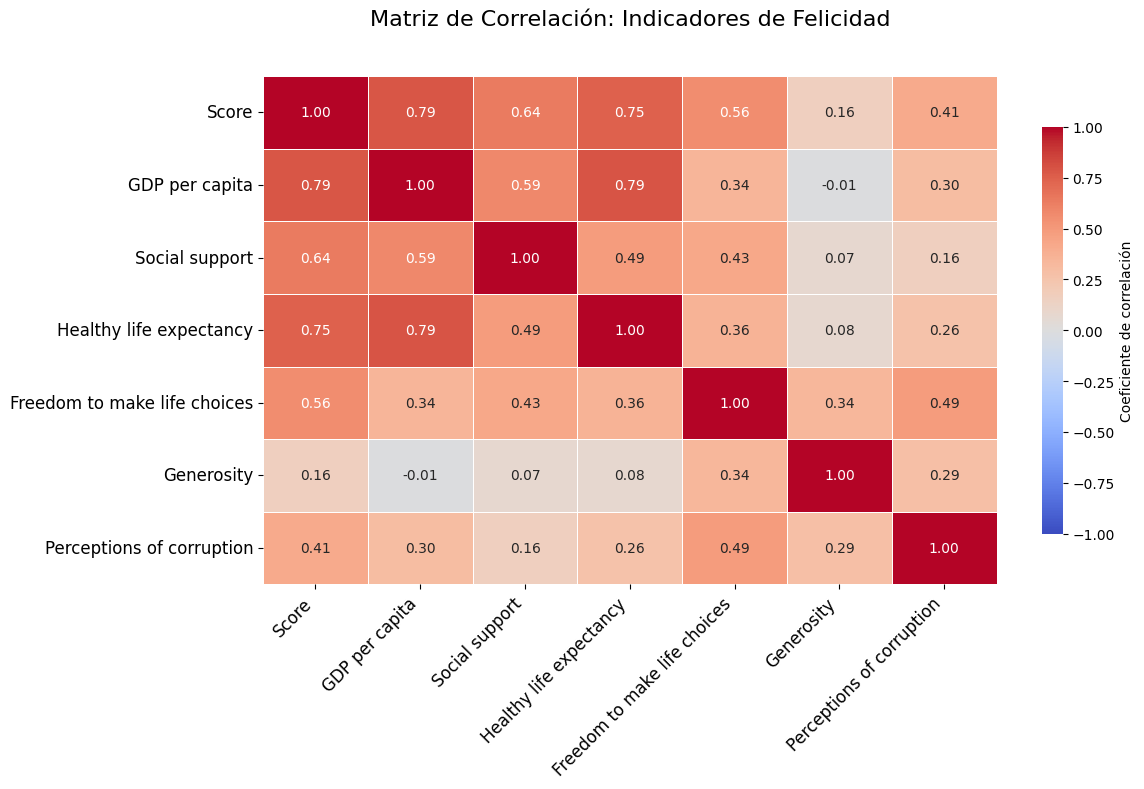

In [59]:
corr_matrix = happiness_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8, "label": "Coeficiente de correlación"}
)

plt.title('Matriz de Correlación: Indicadores de Felicidad\n', pad=20, fontsize=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

max_corr = corr_matrix.unstack().sort_values(ascending=False)
print(f"\n🔷 Correlación más fuerte: {max_corr[1]:.2f}")
print(f"🔶 Correlación más débil: {max_corr[-1]:.2f}")

plt.tight_layout()
plt.show()

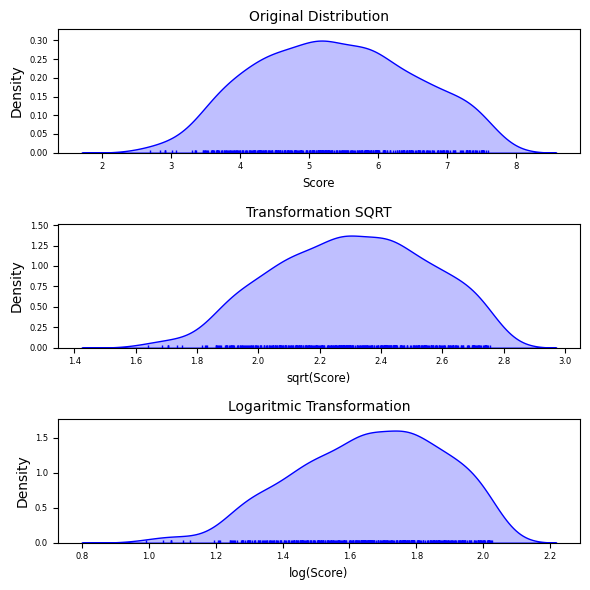

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    happiness_df.Score,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    happiness_df.Score,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Original Distribution", fontsize = 'medium')
axes[0].set_xlabel('Score', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(happiness_df.Score),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(happiness_df.Score),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformation SQRT", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Score)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(happiness_df.Score),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(happiness_df.Score),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Logaritmic Transformation", fontsize = 'medium')
axes[2].set_xlabel('log(Score)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()


In [62]:
distributions = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(happiness_df.Score, distributions=distributions)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

2025-05-10 18:02:27.740 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=1.213973)
2025-05-10 18:02:27.741 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=3.533529)
2025-05-10 18:02:27.769 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted logistic distribution with error=1.292207)
2025-05-10 18:02:27.775 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=1.195528)
2025-05-10 18:02:27.778 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=1.540209)
2025-05-10 18:02:27.802 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=1.662044)
2025-05-10 18:02:27.805 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=1.208392)
2025-05-10 18:02:27.816 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bet

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.159428,353.605673,370.216604,inf,0.054658,1.162181e-01
exponpow,1.167727,360.128474,372.586672,inf,0.045254,2.822674e-01
chi2,1.195528,377.788070,390.246268,inf,0.047402,2.340408e-01
gamma,1.208392,374.828811,387.287009,inf,0.041655,3.781862e-01
norm,1.213973,372.086316,380.391782,inf,0.043329,3.312264e-01
logistic,1.292207,378.668582,386.974047,inf,0.047246,2.373196e-01
powerlaw,1.540209,334.389940,346.848138,inf,0.133513,9.106909e-08
cauchy,1.662044,422.470614,430.776080,inf,0.104262,6.673330e-05
expon,3.533529,383.760612,392.066078,inf,0.264422,1.708142e-29


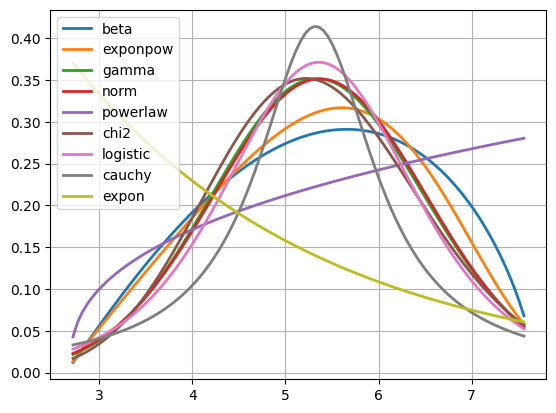

In [63]:
fitter.plot_pdf(names=['beta', 'exponpow', 'gamma', 'norm', 'powerlaw', 'chi2', 'logistic', 'cauchy', 'expon'])
plt.show()

In [65]:
stat, p_value = shapiro(happiness_df['Score'])
print(f"Shapiro-Wilk p-value = {p_value:.4f}")

Shapiro-Wilk p-value = 0.0000


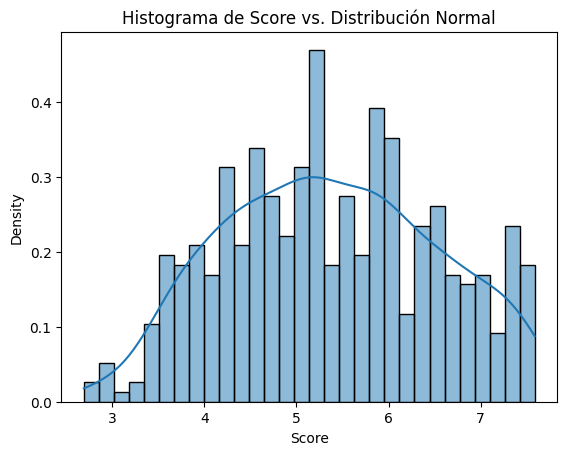

In [66]:
sns.histplot(df['Score'], kde=True, stat='density', bins=30)
plt.title('Histograma de Score vs. Distribución Normal')
plt.show()

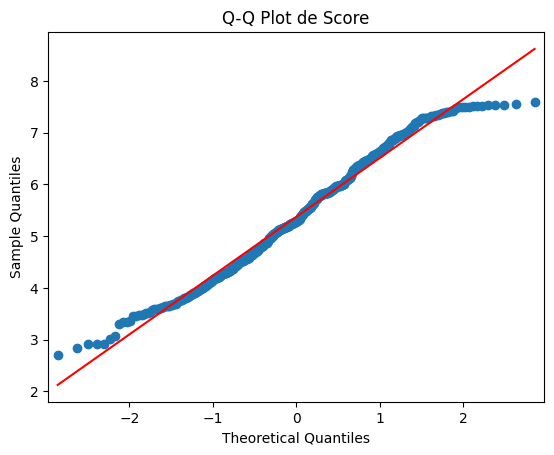

In [67]:
qqplot(df['Score'], line='s')  # 's' = línea teórica normal
plt.title('Q-Q Plot de Score')
plt.show()

The Score data isnt shows a normal distribution

In [ ]:
df['Score_log'] = np.log1p(df['Score'])

In [76]:
happiness_df['Score_log'] = np.log1p(happiness_df['Score'])

In [78]:
df.head()

,Country,Year,Rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,ID,Score_log
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,201501,2.150249
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,201502,2.147217
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,201503,2.143238
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,201504,2.142651
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,201505,2.131441


In [77]:
happiness_df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score_log
0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.150249
1,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.147217
2,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.143238
3,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.142651
4,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.131441


In [79]:
happiness_df.select_dtypes(include=['float64', 'int']).describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score_log
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,5.370728,0.927830,0.990347,0.579968,0.402828,0.242241,0.134790,1.835332
std,1.136998,0.415584,0.318707,0.240161,0.150356,0.131543,0.111313,0.182972
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.306439
25%,4.509000,0.605292,0.793000,0.402301,0.297615,0.152831,0.059777,1.706383
50%,5.282500,0.995439,1.025665,0.630053,0.418347,0.223140,0.099502,1.837768
75%,6.233750,1.252443,1.228745,0.768298,0.516850,0.315824,0.173161,1.978757
max,7.587000,1.870766,1.610574,1.025250,0.669730,0.838075,0.551910,2.150249


In [80]:
resul = df[df['GDP per capita'] == 0]
print(resul)

                      Country  Year  Rank  Score  GDP per capita  \
119          Congo (Kinshasa)  2015   120  4.517             0.0   
233                   Somalia  2016    76  5.440             0.0   
469  Central African Republic  2017   155  2.693             0.0   

     Social support  Healthy life expectancy  Freedom to make life choices  \
119         1.00120                 0.098060                      0.226050   
233         0.33613                 0.114660                      0.567780   
469         0.00000                 0.018773                      0.270842   

     Generosity  Perceptions of corruption       ID  Score_log  
119    0.248340                   0.076250  2015120   1.707834  
233    0.272250                   0.311800   201676   1.862529  
469    0.280876                   0.056565  2017155   1.306439  


In [81]:
resul = df[df['Social support'] == 0]
print(resul)

                      Country  Year  Rank  Score  GDP per capita  \
147  Central African Republic  2015   148  3.678         0.07850   
312                      Togo  2016   155  3.303         0.28123   
469  Central African Republic  2017   155  2.693         0.00000   

     Social support  Healthy life expectancy  Freedom to make life choices  \
147             0.0                 0.066990                      0.488790   
312             0.0                 0.248110                      0.346780   
469             0.0                 0.018773                      0.270842   

     Generosity  Perceptions of corruption       ID  Score_log  
147    0.238350                   0.082890  2015148   1.542871  
312    0.175170                   0.115870  2016155   1.459312  
469    0.280876                   0.056565  2017155   1.306439  


In [82]:
resul = df[df['Healthy life expectancy'] == 0]
print(resul)

          Country  Year  Rank  Score  GDP per capita  Social support  \
122  Sierra Leone  2015   123  4.507        0.330240        0.955710   
268  Sierra Leone  2016   111  4.635        0.364850        0.628000   
453       Lesotho  2017   139  3.808        0.521021        1.190095   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
122                      0.0                      0.408400    0.214880   
268                      0.0                      0.306850    0.238970   
453                      0.0                      0.390661    0.157497   

     Perceptions of corruption       ID  Score_log  
122                   0.087860  2015123   1.706020  
268                   0.081960  2016111   1.728997  
453                   0.119095  2017139   1.570281  


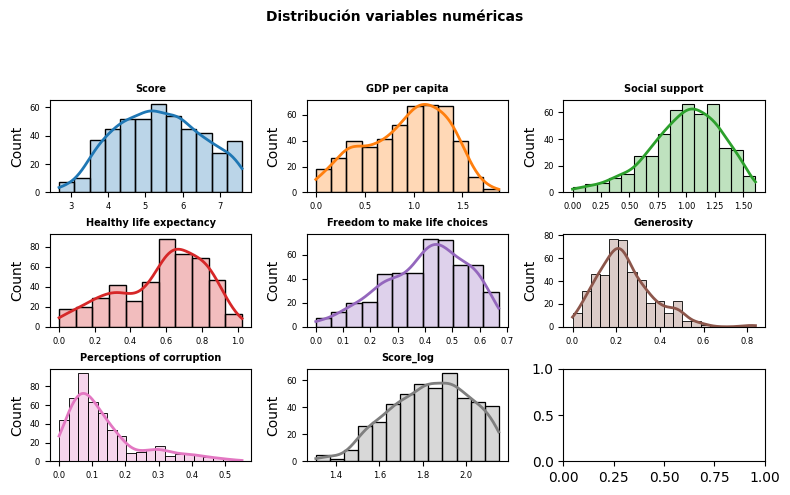

In [85]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 5))
axes = axes.flat
columnas_numeric = happiness_df.columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = happiness_df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

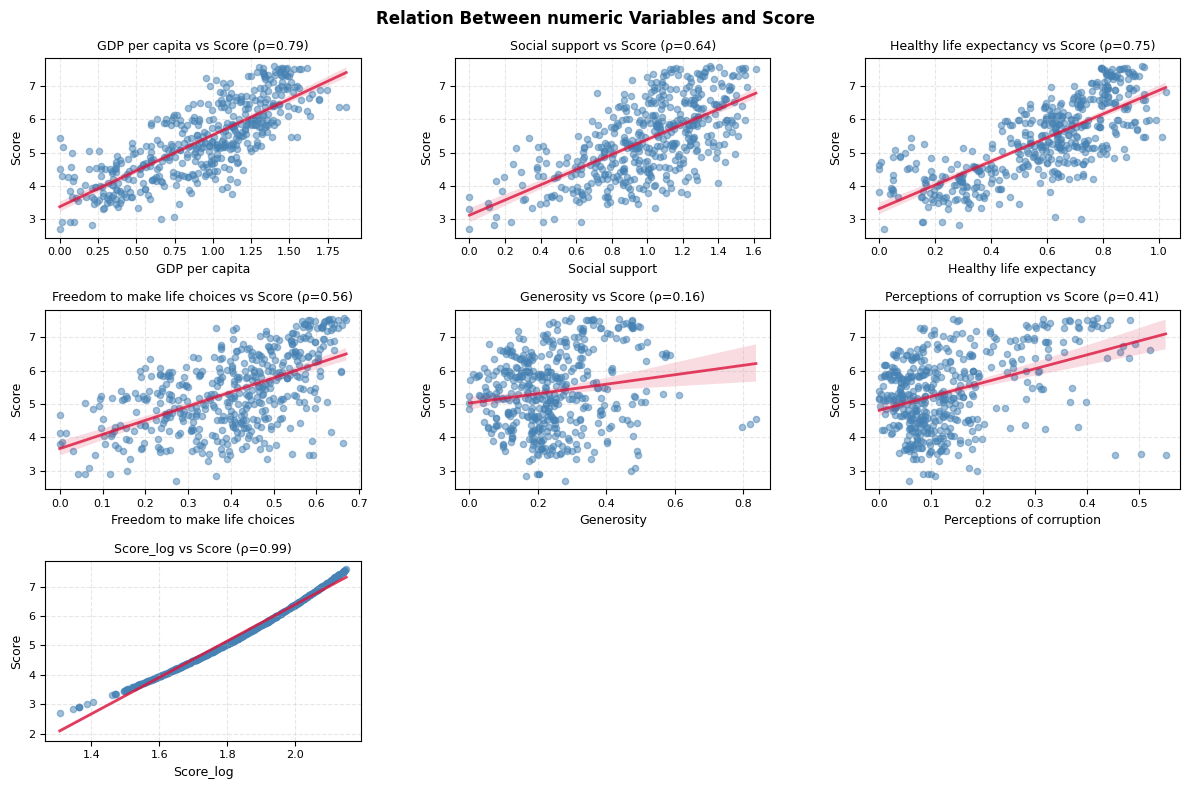

In [87]:

numeric_cols = happiness_df.select_dtypes(include=['float64', 'int']).columns.drop('Score','Score_log')

# Ajuste dinámico del grid de subplots
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
axes = axes.flatten()

# Gráficos de regresión para cada variable
for i, col in enumerate(numeric_cols):
    sns.regplot(
        x=happiness_df[col],
        y=happiness_df['Score'],
        scatter_kws={'alpha': 0.5, 's': 20, 'color': 'steelblue'},
        line_kws={'color': 'crimson', 'linewidth': 2, 'alpha': 0.8},
        ci=95,  # Intervalo de confianza del 95%
        ax=axes[i]
    )
    
    # Personalización de ejes y título
    axes[i].set_title(f'{col} vs Score', fontsize=10, pad=10, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Score', fontsize=9)
    axes[i].tick_params(axis='both', labelsize=8)
    
    # Grid suave
    axes[i].grid(True, linestyle='--', alpha=0.3)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
fig.suptitle('Relation Between numeric Variables and Score', 
             fontsize=12, 
             fontweight='bold',
             y=0.98)

# Mostrar correlaciones en el título de cada subplot (opcional)
for i, col in enumerate(numeric_cols):
    corr = happiness_df[['Score', col]].corr().iloc[0,1]
    axes[i].set_title(f"{col} vs Score (ρ={corr:.2f})", fontsize=9)

plt.show()

In [90]:
df.to_csv('/home/user/workshop3_ml_datastreaming/data/processed/datos_completos.csv', index=False)